# Modelos lineales (ejercicio)

**Autor**: Sergio Rodríguez Calvo

**Importante: comentar adecuadamente cada paso realizado**, relacionándolo con lo visto en la teoría.

## Parte 1: aplicación de modelos lineales a análisis de sentimientos

Se pide aplicar algunos de los clasificadores lineales vistos al problema de decidir si una crítica de cine es positiva o negativa. Para ello volvemos a usar los datos de IMDB (Internet Movie Database) que vimos en el módulo 2 (modelo probabilístico).

Los datos están disponibles en http://ai.stanford.edu/~amaas/data/sentiment/

Vectorizar los textos exactamente como se hizo en la sesión de trabajo del módulo 2, **con *stop_words* y *min_df=100***. 

Una vez los datos (entrenamiento y prueba) estén vectorizados, aplicar los siguientes clasificadores de scikit learn y medir el rendimiento obtenido:

* `LogisticRegression`
* `LinearSVC`

Probar en cada caso con distintos valores del parámetro `C` de regularización, para obtener el mejor rendimiento sobre el conjunto de test. Explicar claramente el efecto que tiene variar ese parámetro en un sentido o en otro. 

In [1]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

In [2]:
print("Cantidad de textos en el conjunto de entrenamiento: {}".format(len(text_train)))
print("Etiquetas: {}".format(reviews_train.target_names))

Cantidad de textos en el conjunto de entrenamiento: 25000
Etiquetas: ['neg', 'pos']


In [3]:
print("text_train[6]:\n{}\n".format(text_train[6]))
print("y_train[6]: {}\n".format(y_train[6]))
print("Etiqueta asociada: {}".format(reviews_train.target_names[y_train[6]]))

text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

y_train[6]: 1

Etiqueta asociada: pos


In [4]:
print("text_train[25]:\n{}\n".format(text_train[25]))
print("y_train[25]: {}\n".format(y_train[25]))
print("Etiqueta asociada: {}".format(reviews_train.target_names[y_train[25]]))

text_train[25]:
b"A chemical spill is turning people into zombies. It's up to two doctor's to survive the epidemic. It's an Andreas Schnaas film so you know what the par for the course will be. Bad acting, horribly awful special effects, and no budget to speak of. The dubbing is ridiculous with a capital R and the saddest thing is that I feel compelled to write one word about this piece of excrement, much less the ten lines mandatory because of the guidelines placed on me by IMDb. My original review of merely one word: Crap wouldn't fly so I have to revise it and go more in to how bad it is. But I don't know if I can, so.. wait I think I may have enough words, or lines rather to make this review pass. Which is cool, I guess. So in summation: This movie sucks balls, don't watch it.<br /><br />My Grade: F"

y_train[25]: 0

Etiqueta asociada: neg


In [5]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [6]:
import numpy as np
print("Ejemplos por cada clase: {}".format(np.bincount(y_train)))

Ejemplos por cada clase: [12500 12500]


In [7]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

In [8]:
print("Cantidad de textos en el conjunto de prueba: {}".format(len(text_test)))

Cantidad de textos en el conjunto de prueba: 25000


In [9]:
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [10]:
print("Ejemplos por cada clase: {}".format(np.bincount(y_test)))

Ejemplos por cada clase: [12500 12500]


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=100, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)

In [12]:
feature_names = vect.get_feature_names_out()
print("Número de términos en el vocabulario con stop words y min_df: {}".format(len(feature_names)))

Número de términos en el vocabulario con stop words y min_df: 3561


In [13]:
X_test = vect.transform(text_test)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.935
Rendimiento sobre el conjunto de prueba: 0.849


In [16]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg100.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.939
Rendimiento sobre el conjunto de prueba: 0.835


In [17]:
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg001.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.897
Rendimiento sobre el conjunto de prueba: 0.872


In [18]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Parte 2: modelos lineales para reconocimiento de dígitos escritos a mano


La función `load_digits` nos permite cargar una versión reducida de un conjunto de imágenes de dígitos escritos a mano (ver detalles en el manual):

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [20]:
digits = load_digits()

Podemos incluso visualizar los dígitos. Por ejemplo, este es el primero de ellos (un cero):

<Figure size 432x288 with 0 Axes>

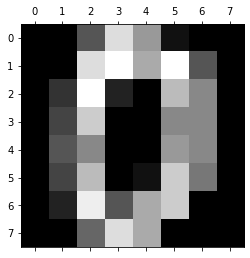

0


In [21]:
plt.gray()
plt.matshow(digits.images[0]) 
plt.show() 
print(digits.target[0])

### 2.1 Clasificación de dígitos escritos a mano con regresión logística (multiclase)

Se pide aplicar regresión logística para obtener un clasificador para este problema multiclase. Probar con varios valores del parámetro `C` para obtener el mejor rendimiento sobre un conjunto de prueba. 

Algunas observaciones:

* Originalmente, en `digits.images` tenemos un array con 1797 arrays 8x8 (es decir, cada imagen viene en 64 pixeles distribuidos en 8 filas y 8 clolumnas). Para poder aplicar los clasificadores, cada imagen debe ser un vector de 64 componentes. Esto se consigue de manera sencilla con el método `reshape`de numpy. 
* Es necesario separar el conjunto de imágenes en entrenamiento y prueba. No olvidar hacerlo de manera estratificada (usando la opción `stratify`de `train_test_split`)
* Medir el rendimiento usando `score`. 

In [22]:
print("Forma de los datos: ", digits.data.shape)
print("Forma de las imagenes: ", digits.images.shape)

Forma de los datos:  (1797, 64)
Forma de las imagenes:  (1797, 8, 8)


Vamos a trabajar con el campo `data` para obtener un vector de 64 componentes para las 1797 imagenes escritas a mano. Será suficiente con hacer un `reshape(8,8)` cuando necesitemos mostrar el número.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=42)

Separamos los dígitos en dos conjuntos, uno de entrenamiento y otro de prueba. A continuación, vamos a aplicar la regresión logistica con parámetros:
* `multi_class` igual a `ovr` para seleccionar el modo multiclase
* `max_iter` suficientemente grande para permitir al modelo converger y evitar los _warnings_

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='ovr', max_iter=10000).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.999
Rendimiento sobre el conjunto de prueba: 0.962


Vemos que el rendimiento sobre el conjunto de entrenamiento es 1, por lo que tenemos sobreajuste. Vamos a probar con diferentes regularizaciones utilizando el parámetro `C`, de modo que:
* Si aumentamos el valor de `C`, bajamos la regularización
* Si disminuimos el valor de `C`, subimos la regularización.

In [25]:
logreg100 = LogisticRegression(C=100, multi_class='ovr', max_iter=10000).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg100.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 1.000
Rendimiento sobre el conjunto de prueba: 0.953


In [26]:
logreg001 = LogisticRegression(C=0.01, multi_class='ovr', max_iter=10000).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg001.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.986
Rendimiento sobre el conjunto de prueba: 0.969


El mejor resultado lo obtenemos con `C=0.01`, es decir, subiendo la regularización.

### 2.2 Clasificación binaria usando regresión logística

Una vez encontrado un buen clasificador para el problema multiclase, mostrar la matriz de confusión finalmente obtenida sobre el conjunto de prueba. También mostrar las imágenes de un par de dígitos respectivamente hayan sido bien y mal clasificados.  Usando `predict_proba` mostrar las predicciones que realiza el modelo sobre esos dos dígitos, y comentar los resultados. 

Deducir de la matriz de confusión un par de dígitos que en general cueste más trabajo distinguir entre sí, y extraer de los datos sólo las imágenes correspondientes a esos dos dígitos. Por ejemplo: si se observa que entre el 8 y el 9 hay más errores de predicción, habría que extraer todas las imágenes de ochos y nueves y crear un conjunto de datos con ellas.  

Crear a partir de esos datos extraidos,  conjuntos de entrenamiento y prueba para aprender con regresión logística un clasificador que sea "especialista" es distinguir un dígito del otro. Como antes, probar con varios valores del parámetro para intentar obtener un buen rendimiento sobre el conjunto de prueba.

**Nota**: para extraer los datos correspondiente a un dígito, aplicar selección condicional de numpy. Por ejemplo, con `digits.target==8` obtenemos un array booleano en el que están a `True` solo las posiciones de los ejemplos cuyo target es 8. Si tenemos un array `a`, entonces `a[digits.target ==8]` es el array en el que se han seleccionado sólo esas posiciones.  
`  

Vamos a obtener las predicciones utilizando el mejor de los modelos anteriores.

In [27]:
predictions = logreg001.predict(X_test)

Vamos a realizar una matrix de confusión para ver cuáles números clasifica mejor y cuáles peor.

In [28]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[44  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  1  0  1  1  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  2  0  0  0  0  1  0 40  0]
 [ 0  0  0  0  1  0  0  1  1 42]]


Vamos a mostrar la matriz de confusión de una forma más visual utilizando `seaborn`, una librería de alto nivel sobre _matplotlib_.

In [29]:
import seaborn as sns
def heatmap(cm):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

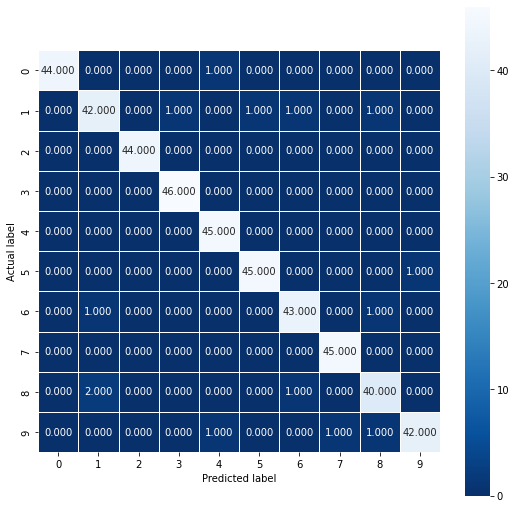

In [30]:
heatmap(cm)

Vemos que los números que peor clasifica son 8, 9 y 2, respectivamente.

Ahora, vamos a obtener aquellos números que ha clasificado mal y a seleccionar dos de ellos.

In [31]:
wrong_values = []
for i in range(len(predictions)):
    if predictions[i] != y_test[i]:
        wrong_values.append(i)

wrong_values[:2]

[0, 25]

Obtenemos los valores de las posiciones 0 y 25 de las predicciones sobre el conjunto de prueba. A continuación, vamos a mostrar estos números visualmente, para lo que tendremos que ejecutar un reescalado.

<Figure size 432x288 with 0 Axes>

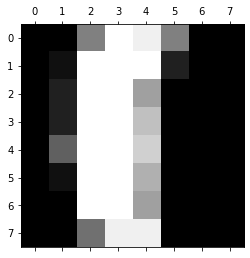

El número es:  1


In [32]:
plt.gray()
plt.matshow(X_test[wrong_values[0]].reshape(8,8)) 
plt.show() 
print("El número es: ",y_test[wrong_values[0]])

<Figure size 432x288 with 0 Axes>

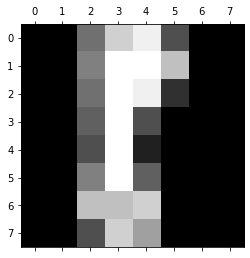

El número es:  8


In [33]:
plt.gray()
plt.matshow(X_test[wrong_values[1]].reshape(8,8)) 
plt.show() 
print("El número es: ", y_test[wrong_values[1]])

Vemos como, efectivamente, ambos números son difíciles de interpretar.

In [34]:
logreg001.predict_proba([X_test[wrong_values[0]]])

array([[1.33316979e-04, 1.54489425e-01, 5.87252970e-04, 3.90356635e-06,
        7.69303096e-03, 4.38620112e-01, 5.59937465e-02, 1.91950945e-03,
        3.40545707e-01, 1.39959890e-05]])

In [35]:
logreg001.predict_proba([X_test[wrong_values[0]]])

array([[1.33316979e-04, 1.54489425e-01, 5.87252970e-04, 3.90356635e-06,
        7.69303096e-03, 4.38620112e-01, 5.59937465e-02, 1.91950945e-03,
        3.40545707e-01, 1.39959890e-05]])

Con `predict_proba` obtenemos la probabilidad que obtiene el modelo para cada número. Visualmente son muy parecidos, por lo que el modelo "duda" entre 1, 5 y 8 para ambos casos.

Vamos ahora a seleccionar los dos números en los que el modelo anterior saca peor puntuacion, que en este caso son el 8 y el 9 (dejamos fuera el 2) y, a continuación, vamos a crear un conjunto de entrenamiento y otro de pruebas.

In [36]:
X, y = digits.data, digits.target
X_data = X[np.logical_or(y == 8, y == 9)]
y_data = y[np.logical_or(y == 8, y == 9)]
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, stratify=y_data, random_state=42)


Vamos a probar, esta vez dentro de un bucle, diferentes configuraciones del modelo para distintos niveles de regularización.

In [40]:
best_score = 0
worst_score = 1
best_values = -1
worst_values = -1

C = [0.01, 1, 100]

for c in C:
    logreg = LogisticRegression(C=c, max_iter=10000).fit(X_train, y_train)
    score = logreg.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_values = c
        
    if score < worst_score:
        worst_score = score
        worst_values = c
    
    print("Rendimiento sobre el conjunto de entrenamiento (C = {}): {:.3f}".format(c, logreg.score(X_train, y_train)))
    print("Rendimiento sobre el conjunto de prueba (C = {}): {:.3f}\n".format(c, score))
    
print("Mejor rendimiento (C = {}): {:.3f}".format(best_values, best_score))
print("Peor rendimiento (C = {}): {:.3f}".format(worst_values, worst_score))

Rendimiento sobre el conjunto de entrenamiento (C = 0.01): 1.000
Rendimiento sobre el conjunto de prueba (C = 0.01): 0.978

Rendimiento sobre el conjunto de entrenamiento (C = 1): 1.000
Rendimiento sobre el conjunto de prueba (C = 1): 0.978

Rendimiento sobre el conjunto de entrenamiento (C = 100): 1.000
Rendimiento sobre el conjunto de prueba (C = 100): 0.966

Mejor rendimiento (C = 0.01): 0.978
Peor rendimiento (C = 100): 0.966


En este caso, los tres modelos tienen sobreajuste, pero con `C=1` obtenemos el mejor rendimiento sobre el conjunto de prueba.

### 2.3 Clasificación de dígitos con SVC (multiclase)

Volviendo al problema multiclase de 2.1, aplicar ahora máquinas de vectores soporte con kernel (`SVC`) para el problema de reconocer los dígitos. Probar al menos con varios valores de los parámetros `C` y `gamma`, para obtener un buen rendimiento sobre el conjunto de prueba. 

Vamos a probar con varios valores de `C` y `gamma`, también, utilizando un bucle como el anterior. Además, hemos utilizado el parámetro `decision_function_shape` igual a `ovo` para indicar que queremos el modo multiclase.

In [41]:
import itertools
from sklearn.svm import SVC

best_score = 0
worst_score = 1
best_values = [-1,-1]
worst_values = [-1,-1]

C = [0.01, 1, 100]
gamma = [0.01, 1, 100]

for (C,gamma) in itertools.product(C, gamma):
    svc = SVC(C=C, gamma=gamma, decision_function_shape='ovo').fit(X_train, y_train)
    score = svc.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_values = [C,gamma]
        
    if score < worst_score:
        worst_score = score
        worst_values = [C,gamma]
    
    print("Rendimiento sobre el conjunto de entrenamiento (gamma = {}, C = {}): {:.3f}".format(gamma,C, svc.score(X_train, y_train)))
    print("Rendimiento sobre el conjunto de prueba (gamma = {}, C = {}): {}\n".format(gamma, C, score))
    
print("Mejor rendimiento (gamma = {}, C = {}): {:.3f}".format(best_values[1], best_values[0], best_score))
print("Peor rendimiento (gamma = {}, C = {}): {:.3f}".format(worst_values[1], worst_values[0], worst_score))

Rendimiento sobre el conjunto de entrenamiento (gamma = 0.01, C = 0.01): 0.509
Rendimiento sobre el conjunto de prueba (gamma = 0.01, C = 0.01): 0.5056179775280899

Rendimiento sobre el conjunto de entrenamiento (gamma = 1, C = 0.01): 0.509
Rendimiento sobre el conjunto de prueba (gamma = 1, C = 0.01): 0.5056179775280899

Rendimiento sobre el conjunto de entrenamiento (gamma = 100, C = 0.01): 0.509
Rendimiento sobre el conjunto de prueba (gamma = 100, C = 0.01): 0.5056179775280899

Rendimiento sobre el conjunto de entrenamiento (gamma = 0.01, C = 1): 1.000
Rendimiento sobre el conjunto de prueba (gamma = 0.01, C = 1): 0.898876404494382

Rendimiento sobre el conjunto de entrenamiento (gamma = 1, C = 1): 1.000
Rendimiento sobre el conjunto de prueba (gamma = 1, C = 1): 0.5056179775280899

Rendimiento sobre el conjunto de entrenamiento (gamma = 100, C = 1): 1.000
Rendimiento sobre el conjunto de prueba (gamma = 100, C = 1): 0.5056179775280899

Rendimiento sobre el conjunto de entrenamient

En este caso, el mejor rendimiento lo obtenemos con `C=1` y `gamma=0.01`, y el peor con `C=0.01` y `gamma=0.01`